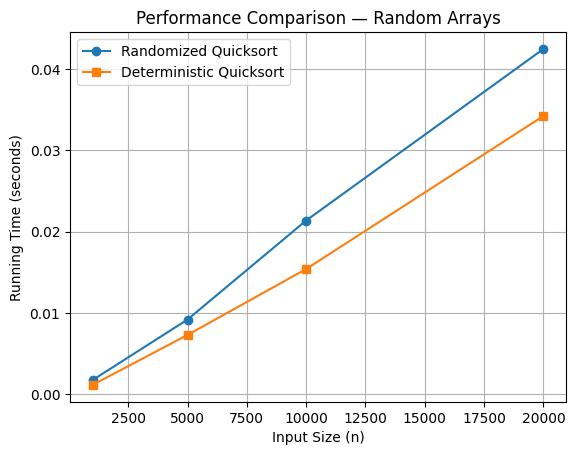

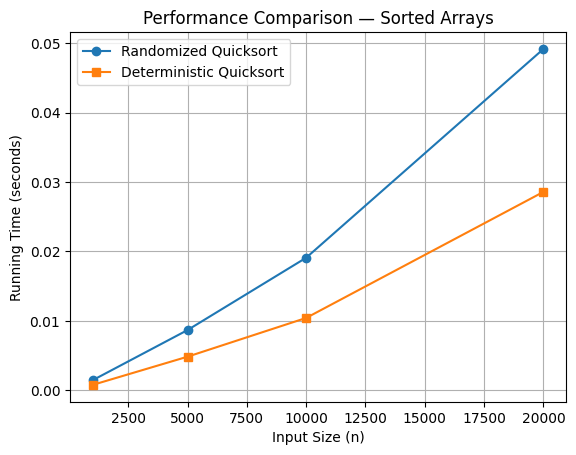

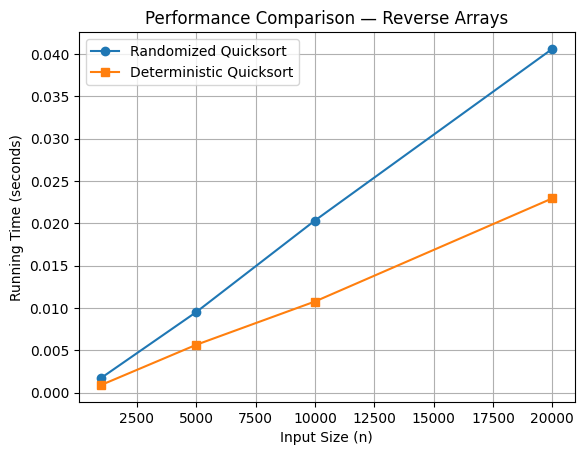

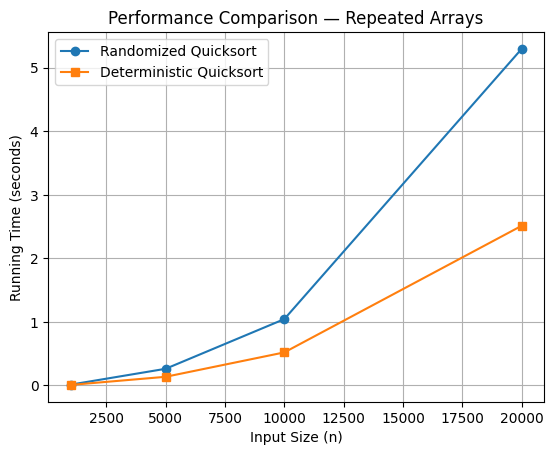

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import sys

# Increase the recursion limit to handle large inputs for quicksort
sys.setrecursionlimit(25000) # Set a limit higher than the maximum input size

# -----------------------
# Randomized Quicksort
# -----------------------
def randomized_partition(arr, low, high):
    pivot_index = random.randint(low, high)
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def randomized_quicksort(arr, low, high):
    if low < high:
        pi = randomized_partition(arr, low, high)
        randomized_quicksort(arr, low, pi - 1)
        randomized_quicksort(arr, pi + 1, high)

# -----------------------
# Deterministic Quicksort
# -----------------------
def deterministic_partition(arr, low, high):
    # Median-of-three pivot selection to prevent worst-case scenarios for sorted/reverse-sorted arrays
    mid = (low + high) // 2

    # Ensure arr[low] <= arr[mid] <= arr[high] for these three elements
    if arr[mid] < arr[low]:
        arr[low], arr[mid] = arr[mid], arr[low]
    if arr[high] < arr[low]:
        arr[low], arr[high] = arr[high], arr[low]
    if arr[high] < arr[mid]:
        arr[mid], arr[high] = arr[high], arr[mid]

    # Now, arr[mid] is the median of the three. Swap it with arr[low] to use it as the pivot.
    arr[low], arr[mid] = arr[mid], arr[low]
    pivot = arr[low]

    left = low + 1
    right = high
    done = False
    while not done:
        while left <= right and arr[left] <= pivot:
            left += 1
        while arr[right] >= pivot and right >= left:
            right -= 1
        if right < left:
            done = True
        else:
            arr[left], arr[right] = arr[right], arr[left]
    arr[low], arr[right] = arr[right], arr[low]
    return right

def deterministic_quicksort(arr, low, high):
    if low < high:
        pi = deterministic_partition(arr, low, high)
        deterministic_quicksort(arr, low, pi - 1)
        deterministic_quicksort(arr, pi + 1, high)

# -----------------------
# Empirical Comparison
# -----------------------
def measure_time(sort_fn, arr):
    start = time.time()
    sort_fn(arr, 0, len(arr) - 1)
    return time.time() - start

def compare_quicksorts():
    sizes = [1000, 5000, 10000, 20000]
    distributions = {
        "Random": lambda n: [random.randint(0, 10000) for _ in range(n)],
        "Sorted": lambda n: list(range(n)),
        "Reverse": lambda n: list(range(n, 0, -1)),
        "Repeated": lambda n: [random.choice([1, 2, 3, 4, 5]) for _ in range(n)]
    }

    results = {dist: {"Randomized": [], "Deterministic": []} for dist in distributions}

    for dist_name, dist_fn in distributions.items():
        for n in sizes:
            arr1 = dist_fn(n)
            arr2 = arr1.copy()

            t1 = measure_time(randomized_quicksort, arr1)
            t2 = measure_time(deterministic_quicksort, arr2)

            results[dist_name]["Randomized"].append(t1)
            results[dist_name]["Deterministic"].append(t2)

    # Plot results
    for dist_name in distributions:
        plt.figure()
        plt.plot(sizes, results[dist_name]["Randomized"], label="Randomized Quicksort", marker='o')
        plt.plot(sizes, results[dist_name]["Deterministic"], label="Deterministic Quicksort", marker='s')
        plt.xlabel("Input Size (n)")
        plt.ylabel("Running Time (seconds)")
        plt.title(f"Performance Comparison — {dist_name} Arrays")
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    compare_quicksorts()


In [ ]:
class HashNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTableChaining:
    def __init__(self, capacity=10):
        self.capacity = capacity
        self.size = 0
        self.table = [None] * capacity

    def _hash(self, key):
        """Simple universal hash function."""
        return hash(key) % self.capacity

    def insert(self, key, value):
        index = self._hash(key)
        head = self.table[index]
        while head:
            if head.key == key:
                head.value = value  # Update existing
                return
            head = head.next
        new_node = HashNode(key, value)
        new_node.next = self.table[index]
        self.table[index] = new_node
        self.size += 1
        if self.load_factor() > 0.75:
            self._resize()

    def search(self, key):
        index = self._hash(key)
        head = self.table[index]
        while head:
            if head.key == key:
                return head.value
            head = head.next
        return None

    def delete(self, key):
        index = self._hash(key)
        head = self.table[index]
        prev = None
        while head:
            if head.key == key:
                if prev:
                    prev.next = head.next
                else:
                    self.table[index] = head.next
                self.size -= 1
                return True
            prev = head
            head = head.next
        return False

    def load_factor(self):
        return self.size / self.capacity

    def _resize(self):
        """Doubles the table size to reduce load factor."""
        old_table = self.table
        self.capacity *= 2
        self.table = [None] * self.capacity
        self.size = 0
        for node in old_table:
            while node:
                self.insert(node.key, node.value)
                node = node.next

    def __str__(self):
        result = []
        for i, node in enumerate(self.table):
            chain = []
            while node:
                chain.append(f"{node.key}:{node.value}")
                node = node.next
            result.append(f"[{i}] -> {' -> '.join(chain) if chain else 'None'}")
        return "\n".join(result)

# -----------------------
# Demonstration
# -----------------------
if __name__ == "__main__":
    ht = HashTableChaining()
    ht.insert("apple", 10)
    ht.insert("banana", 20)
    ht.insert("grape", 30)
    ht.insert("orange", 40)
    print("Hash Table after insertions:\n", ht)

    print("\nSearch 'banana':", ht.search("banana"))
    ht.delete("banana")
    print("\nAfter deleting 'banana':\n", ht)

    print("\nCurrent Load Factor:", ht.load_factor())


Hash Table after insertions:
 [0] -> None
[1] -> grape:30
[2] -> None
[3] -> None
[4] -> apple:10
[5] -> banana:20
[6] -> None
[7] -> None
[8] -> None
[9] -> orange:40

Search 'banana': 20

After deleting 'banana':
 [0] -> None
[1] -> grape:30
[2] -> None
[3] -> None
[4] -> apple:10
[5] -> None
[6] -> None
[7] -> None
[8] -> None
[9] -> orange:40

Current Load Factor: 0.3
